In [1]:
import h5py
import deepdish as dd
from convergenets.utils import utils
from scripts.visualizations.helpers import load_weights
from tqdm import tqdm
from tqdm import trange

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import itertools
import deepdish as dd
from scipy.stats import norm as sp_norm
from sklearn.linear_model import LinearRegression


# Motivating figure 1

python train.py --experiment motivating_fig --expid res18_cifar100 --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-01 --overwrite -v

python train.py --experiment motivating_fig --expid alexnet_cifar100 --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model alexnet --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-02 --overwrite -v

python train.py --experiment motivating_fig --expid densenet121_cifar100 --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model densenet121 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-03 --overwrite -v

python train.py --experiment motivating_fig --expid vgg16bn_cifar100 --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model vgg16-bn --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-04 --overwrite -v

python train.py --experiment motivating_fig --expid wideres18_cifar100 --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model wide-resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-05 --overwrite -v


CUDA_VISIBLE_DEVICES=3  python extract.py --experiment motivating_fig --expid res18_cifar100 --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --dataset cifar100 --model resnet18 --model-class tinyimagenet --overwrite

CUDA_VISIBLE_DEVICES=3 python extract.py --experiment motivating_fig --expid alexnet_cifar100 --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --dataset cifar100 --model alexnet --model-class tinyimagenet --overwrite

CUDA_VISIBLE_DEVICES=3 python extract.py --experiment motivating_fig --expid densenet121_cifar100 --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --dataset cifar100 --model densenet121 --model-class tinyimagenet --overwrite 

CUDA_VISIBLE_DEVICES=3 python extract.py --experiment motivating_fig --expid vgg16bn_cifar100 --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --dataset cifar100 --model vgg16-bn --model-class tinyimagenet --overwrite

CUDA_VISIBLE_DEVICES=3 python extract.py --experiment motivating_fig --expid wideres18_cifar100 --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --dataset cifar100 --model wide-resnet18 --model-class tinyimagenet --overwrite



CUDA_VISIBLE_DEVICES=3 python cache.py --metrics loss_diff --experiment motivating_fig --expid wideres18_cifar100 --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite


### Better hyperparams for these
python train.py --experiment motivating_fig --expid alexnet_cifar100_better --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model alexnet --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 78 --lean-ckpt True --train-batch-size 16 --lr 0.01 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-02 --overwrite -v

python train.py --experiment motivating_fig --expid vgg16bn_cifar100_better --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model vgg16-bn --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.01 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-02 --overwrite -v

python train.py --experiment motivating_fig --expid googlenet_cifar100 --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model googlenet --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.01 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-04 --overwrite -v

python train.py --experiment motivating_fig --expid res18_cifar100_200 --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 200 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-03 --overwrite -v

python train.py --experiment motivating_fig --expid googlenet_cifar100_200_better --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model googlenet --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 200 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.005 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-01 --overwrite -v


### Now, restarting the above from their trained state, so we can compute the weight distance metrics
python train.py --experiment motivating_fig --expid alexnet_cifar100_pretrained --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model alexnet --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 78 --lean-ckpt True --train-batch-size 16 --lr 0.01 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-02 --overwrite -v --restore-path /home/jvrsgsty/models/alexnet_step51221.tar

python train.py --experiment motivating_fig --expid vgg16bn_cifar100_pretrained --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model vgg16-bn --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.01 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-03 --overwrite -v --restore-path /home/jvrsgsty/models/vgg16bn_step23716.tar

python train.py --experiment motivating_fig --expid res18_cifar100_pretrained --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-04 --overwrite -v --restore-path /home/jvrsgsty/models/res18_step9996.tar


python train.py --experiment motivating_fig --expid googlenet_cifar100_pretrained --save-dir gs://jv_neural_mechanics --dataset cifar100 --data-dir /home/jvrsgsty/data --model googlenet --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 100 --save-freq 39 --lean-ckpt True --train-batch-size 32 --lr 0.001 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-01 --overwrite -v --restore-path /home/jvrsgsty/models/googlenet_step29596.tar




## Similar thing, but for pretrained models

python train.py --experiment fig_1 --expid alexnet_imagenet_pretrained --save-dir gs://jv_neural_mechanics --dataset imagenet --data-dir /home/jvrsgsty/data --model alexnet --model-class imagenet --pretrained True --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 10 --save-freq 500 --lean-ckpt True --train-batch-size 16 --lr 0.01 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-02 --overwrite -v 

python train.py --experiment fig_1 --expid res18_imagenet_pretrained --save-dir gs://jv_neural_mechanics --dataset imagenet --data-dir /home/jvrsgsty/data --model resnet18 --model-class imagenet --pretrained True --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 10 --save-freq 250 --lean-ckpt True --train-batch-size 32 --lr 0.0001 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-03 --overwrite -v 

python train.py --experiment fig_1 --expid res34_imagenet_pretrained --save-dir gs://jv_neural_mechanics --dataset imagenet --data-dir /home/jvrsgsty/data --model resnet34 --model-class imagenet --pretrained True --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 10 --save-freq 250 --lean-ckpt True --train-batch-size 32 --lr 0.0001 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-04 --overwrite -v

python train.py --experiment fig_1 --expid vgg16bn_imagenet_pretrained --save-dir gs://jv_neural_mechanics --dataset imagenet --data-dir /home/jvrsgsty/data --model vgg16-bn --model-class imagenet --pretrained True --loss ce --optimizer custom_sgd --test-batch-size 128 --epochs 10 --save-freq 250 --lean-ckpt True --train-batch-size 32 --lr 0.00001 --wd 0.0005 --momentum 0.9 --tpu jv-pt-tpu-05 --overwrite -v

In [2]:
def plot_moving_average(ax, x, y, w=5, **plot_kwargs):
    moving_average = np.convolve(y, np.ones(w), 'valid') / w
    ax.plot(x[(w-1)//2:-(w-1)//2], moving_average, **plot_kwargs)
    plot_kwargs["alpha"] = 0.5
    ax.plot(x, y, **plot_kwargs)

In [3]:
def style_axes(ax, numyticks=5, numxticks=5):
    ax.tick_params(axis="y", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=24)
    ax.yaxis.set_major_locator(plt.MaxNLocator(numyticks))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=24)
    ax.xaxis.set_major_locator(plt.MaxNLocator(numxticks))
    #ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.ticklabel_format(axis="x", useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)

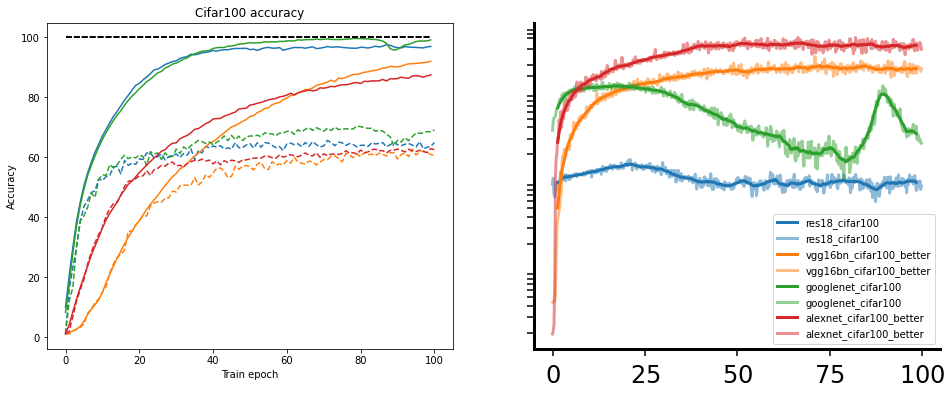

In [4]:
# sampling on consecutive steps, 5 times an epoch
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "motivating_fig"
expids = [
    "res18_cifar100",
    #"vgg16bn_cifar100",
    "vgg16bn_cifar100_better",
    #"wideres18_cifar100",
    "googlenet_cifar100",
    #"alexnet_cifar100",
    "alexnet_cifar100_better",
    #"densenet121_cifar100",
]
lr = 0.1
for i,expid in enumerate(expids):    
    #axes[0].plot(np.arange(len(d["test_loss"]))/5, d["test_loss"], label=expid)
    #axes[0].legend()
    #axes[0].set_ylim([-0.01, 0.1])
    #axes[0].set_title("Cifar100 |L_{k+1} - L_{k}|_2^2")
    #axes[0].set_ylabel("| L_{k+1} - L_{k}|_2^2")
    #axes[0].set_xlabel("Train epoch")
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    
    axes[0].plot(d["train_accuracy1"], label=expid, color=plt.cm.tab10(i))
    axes[0].plot(d["test_accuracy1"], label=expid, color=plt.cm.tab10(i), ls="--")
    axes[0].plot([100]*len(d["train_accuracy1"]), color="k", ls="--")
    #axes[0].legend()
    #axes[0].set_ylim([99, 101])
    axes[0].set_title("Cifar100 accuracy")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_xlabel("Train epoch")
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    plot_kwargs = {"label":expid, "color": plt.cm.tab10(i), "lw": 3}
    plot_moving_average(axes[1], np.arange(len(d["vel_norm"]))/5, d["vel_norm"], w=15, **plot_kwargs)
    axes[1].legend()
    #axes[1].set_ylim([0, 1])
    #axes[1].set_title("Cifar100 |theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_ylabel("|theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_xlabel("Train epoch")
    axes[1].set_yscale("log")
    style_axes(axes[1])


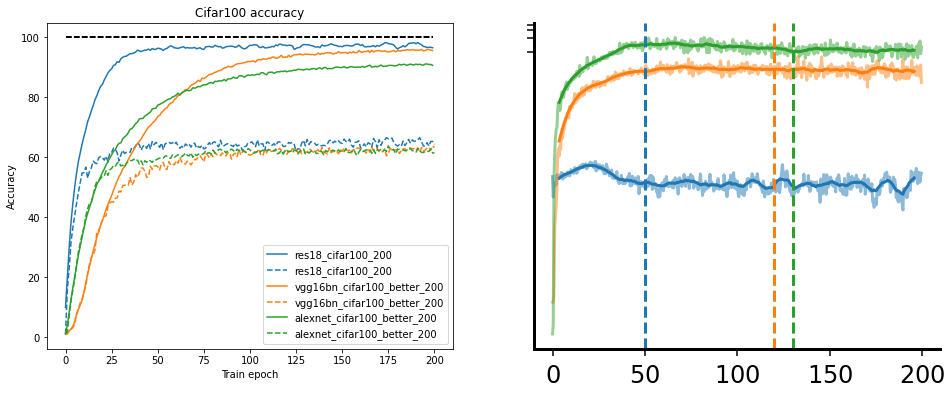

In [5]:
# sampling on consecutive steps, 5 times an epoch
# TODO: stan style average and shadows
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "motivating_fig"
expids = [
    "res18_cifar100_200",
    "vgg16bn_cifar100_better_200",
    "alexnet_cifar100_better_200",
    #"googlenet_cifar100_200",
    #"googlenet_cifar100_200_better",
    #"googlenet_cifar100_200_better_2",
]
stop_epochs = [50,120,130,150]
lrs = [0.01, 0.01, 0.01, 0.001]
for i,expid in enumerate(expids):    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    
    axes[0].plot(d["train_accuracy1"], label=expid, color=plt.cm.tab10(i))
    axes[0].plot(d["test_accuracy1"], label=expid, color=plt.cm.tab10(i), ls="--")
    axes[0].plot([100]*len(d["train_accuracy1"]), color="k", ls="--")
    #axes[0].set_ylim([99, 101])
    axes[0].set_title("Cifar100 accuracy")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_xlabel("Train epoch")
    axes[0].legend()
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    plot_kwargs = {"label":expid, "color": plt.cm.tab10(i),"lw": 3}
    plot_moving_average(
        axes[1], 
        np.arange(len(d["vel_norm"]))/2.5, (lrs[i]**2)*d["vel_norm"]**2, w=20, **plot_kwargs
    )
    #axes[1].set_ylim([0, 1])
    #axes[1].set_title("Cifar100 |theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_ylabel("|theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_xlabel("Train epoch")
    axes[1].set_yscale("log")
    style_axes(axes[1])

for i,expid in enumerate(expids):   
    ylim = axes[1].get_ylim()
    axes[1].plot(stop_epochs[i]*np.ones(2), ylim, 
                "--", lw=3, color=plt.cm.tab10(i))
    axes[1].set_ylim(ylim)

# Flattens out at epoch: 50 for resnet, 130 for alexnet, 120 for vgg, 
# Steps are approx: 9765 for resnet (256 bs), 50781 for alexnet (128 bs), for vgg  (256 bs)
plt.savefig("fig1.pdf")

/home/jvrsgsty/py3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/home/jvrsgsty/py3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/home/jvrsgsty/py3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/home/jvrsgsty/py3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


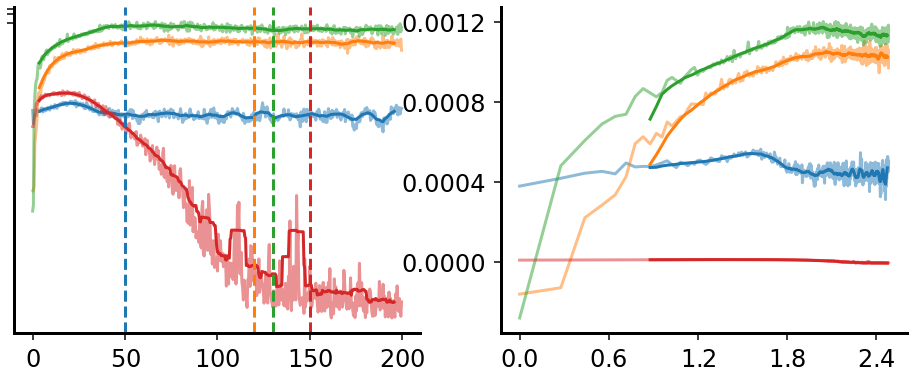

In [6]:
# sampling on consecutive steps, 5 times an epoch
# TODO: stan style average and shadows
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "motivating_fig"
expids = [
    "res18_cifar100_200",
    "vgg16bn_cifar100_better_200",
    "alexnet_cifar100_better_200",
    #"googlenet_cifar100_200",
    #"googlenet_cifar100_200_better",
    "googlenet_cifar100_200_better_2",
]
stop_epochs = [50,120,130,150]
lrs = [0.01, 0.01, 0.01, 0.001]
for i,expid in enumerate(expids):    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    plot_kwargs = {"label":expid, "color": plt.cm.tab10(i),"lw": 3}
    plot_moving_average(
        axes[0], 
        np.arange(len(d["vel_norm"]))/2.5, (lrs[i]**2)*d["vel_norm"]**2, w=20, **plot_kwargs
    )
    #axes[1].set_ylim([0, 1])
    #axes[1].set_title("Cifar100 |theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_ylabel("|theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_xlabel("Train epoch")
    axes[0].set_yscale("log")
    style_axes(axes[0])
    
    plot_moving_average(
        axes[1], 
        np.log(np.arange(len(d["vel_norm"])))/2.5, (lrs[i]**2)*np.log(d["vel_norm"]**2), w=20, **plot_kwargs
    )
    #axes[1].set_ylim([0, 1])
    #axes[1].set_title("Cifar100 |theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_ylabel("|theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_xlabel("Train epoch")
    style_axes(axes[1])

for i,expid in enumerate(expids):   
    ylim = axes[0].get_ylim()
    axes[0].plot(stop_epochs[i]*np.ones(2), ylim, 
                "--", lw=3, color=plt.cm.tab10(i))
    axes[0].set_ylim(ylim)

# Flattens out at epoch: 50 for resnet, 130 for alexnet, 120 for vgg, 
# Steps are approx: 9765 for resnet (256 bs), 50781 for alexnet (128 bs), for vgg  (256 bs)
plt.savefig("fig1.pdf")

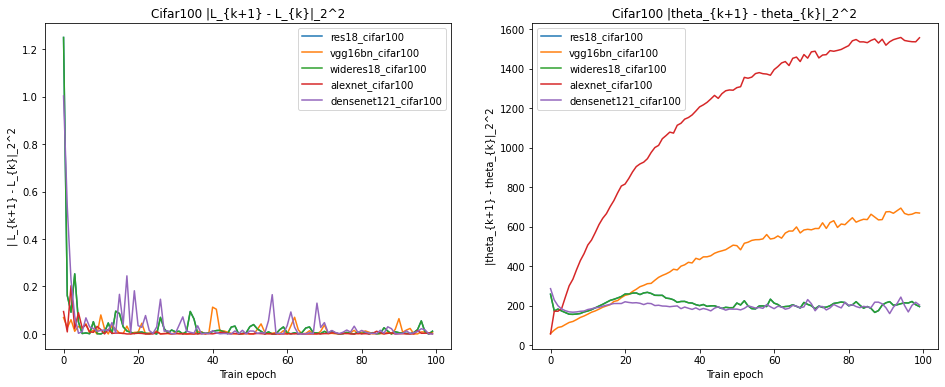

In [7]:
# Sampling every epoch
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "motivating_fig"
expids = [
    "res18_cifar100",
    "vgg16bn_cifar100",
    "wideres18_cifar100",
    "alexnet_cifar100",
    "densenet121_cifar100",
]
lr = 0.1
for expid in expids:
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff.h5", "/loss_diff")
    
    axes[0].plot(np.arange(len(d["test_loss"])), d["test_loss"], label=expid)
    axes[0].legend()
    #axes[0].set_ylim([-0.01, 0.1])
    axes[0].set_title("Cifar100 |L_{k+1} - L_{k}|_2^2")
    axes[0].set_ylabel("| L_{k+1} - L_{k}|_2^2")
    axes[0].set_xlabel("Train epoch")
    
    axes[1].plot(np.arange(len(d["weight_diff_norm"])), d["weight_diff_norm"], label=expid)
    axes[1].legend()
    #axes[1].set_ylim([94, 102])
    axes[1].set_title("Cifar100 |theta_{k+1} - theta_{k}|_2^2")
    axes[1].set_ylabel("|theta_{k+1} - theta_{k}|_2^2")
    axes[1].set_xlabel("Train epoch")


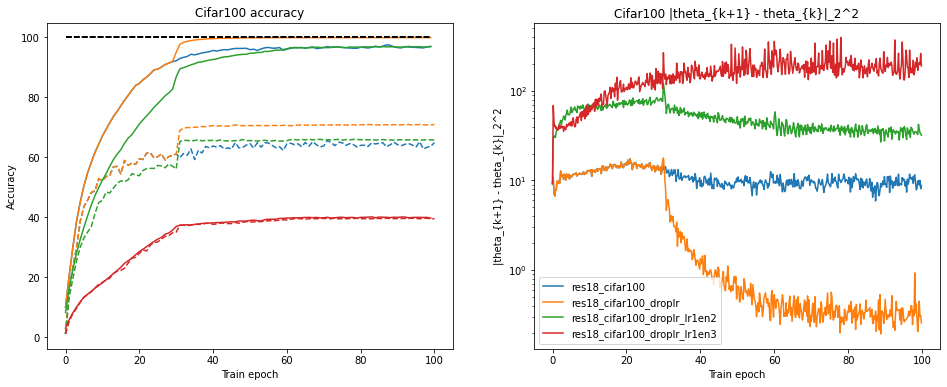

In [8]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "motivating_fig"
expids = [
    "res18_cifar100",
    "res18_cifar100_droplr",
    "res18_cifar100_droplr_lr1en2",
    "res18_cifar100_droplr_lr1en3",
]
lr = 0.1
for i,expid in enumerate(expids):
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    
    axes[0].plot(d["train_accuracy1"], label=expid, color=plt.cm.tab10(i))
    axes[0].plot(d["test_accuracy1"], label=expid, color=plt.cm.tab10(i), ls="--")
    axes[0].plot([100]*len(d["train_accuracy1"]), color="k", ls="--")
    #axes[0].legend()
    #axes[0].set_ylim([99, 101])
    axes[0].set_title("Cifar100 accuracy")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_xlabel("Train epoch")
    
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    axes[1].plot(np.arange(len(d["vel_norm"]))/5, d["vel_norm"], label=expid)
    axes[1].plot([0]*(len(d["vel_norm"])//5), color="k", ls="--")
    axes[1].legend()
    #axes[1].set_ylim([0, 1])
    axes[1].set_title("Cifar100 |theta_{k+1} - theta_{k}|_2^2")
    axes[1].set_ylabel("|theta_{k+1} - theta_{k}|_2^2")
    axes[1].set_xlabel("Train epoch")
    axes[1].set_yscale("log")


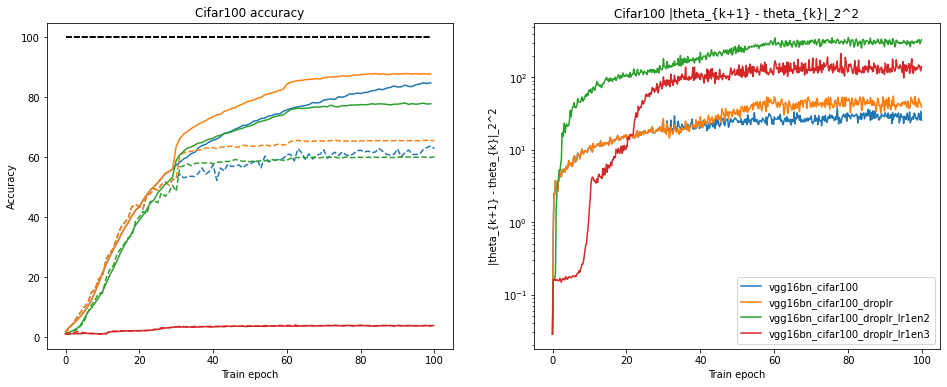

In [9]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "motivating_fig"
expids = [
    "vgg16bn_cifar100",
    "vgg16bn_cifar100_droplr",
    "vgg16bn_cifar100_droplr_lr1en2",
    "vgg16bn_cifar100_droplr_lr1en3",
]
lr = 0.1
for i,expid in enumerate(expids):
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    
    axes[0].plot(d["train_accuracy1"], label=expid, color=plt.cm.tab10(i))
    axes[0].plot(d["test_accuracy1"], label=expid, color=plt.cm.tab10(i), ls="--")
    axes[0].plot([100]*len(d["train_accuracy1"]), color="k", ls="--")
    #axes[0].legend()
    #axes[0].set_ylim([99, 101])
    axes[0].set_title("Cifar100 accuracy")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_xlabel("Train epoch")
    
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    axes[1].plot(np.arange(len(d["vel_norm"]))/5, d["vel_norm"], label=expid)
    axes[1].plot([0]*(len(d["vel_norm"])//5), color="k", ls="--")
    axes[1].legend()
    #axes[1].set_ylim([0, 1])
    axes[1].set_title("Cifar100 |theta_{k+1} - theta_{k}|_2^2")
    axes[1].set_ylabel("|theta_{k+1} - theta_{k}|_2^2")
    axes[1].set_xlabel("Train epoch")
    axes[1].set_yscale("log")


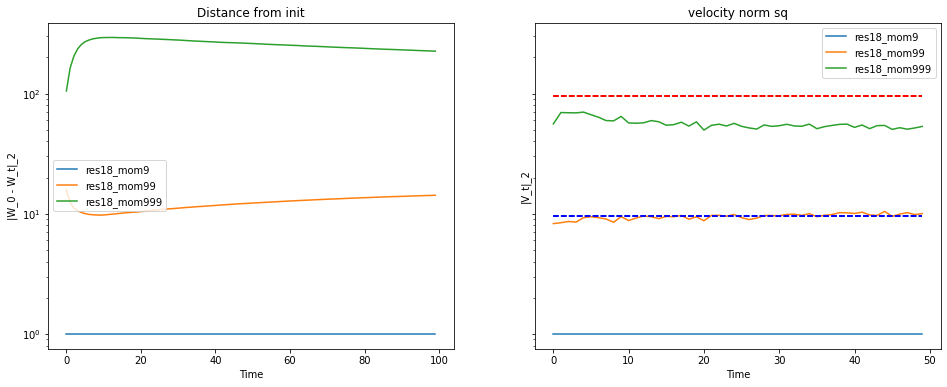

In [10]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows), sharey=True)

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "pretrained_imnet_dist_from_start"
expids = [
    "res18_mom9",
    "res18_mom99",
    "res18_mom999",
]
lr = 0.1
d0 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expids[0]}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
d00 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expids[0]}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
for i,expid in enumerate(expids):
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    
    if len(d["dist_from_start"]) > 120:
        d["dist_from_start"] = d["dist_from_start"][1::2]
    d["dist_from_start"] = d["dist_from_start"]**2
    d["dist_from_start"] /= d0["dist_from_start"]**2
    axes[0].plot(d["dist_from_start"], label=expid, color=plt.cm.tab10(i))
    axes[0].set_title("Distance from init")
    axes[0].set_ylabel("|W_0 - W_t|_2")
    axes[0].set_xlabel("Time")
    axes[0].set_yscale("log")
    axes[0].legend()
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    
    if len(d["vel_norm"]) > 60:
        d["vel_norm"] = d["vel_norm"][1::2]
    d["vel_norm"] /= d00["vel_norm"]
    axes[1].plot(d["vel_norm"], label=expid, color=plt.cm.tab10(i))
    axes[1].plot(range(d["vel_norm"].shape[0]), (1-0.9**2)/(1-0.999**2)*np.ones_like(d["vel_norm"]), "--r")
    axes[1].plot(range(d["vel_norm"].shape[0]), (1-0.9**2)/(1-0.99**2)*np.ones_like(d["vel_norm"]), "--b")
    axes[1].set_title("velocity norm sq")
    axes[1].set_ylabel("|V_t|_2")
    axes[1].set_xlabel("Time")
    axes[1].set_yscale("log")
    axes[1].legend()

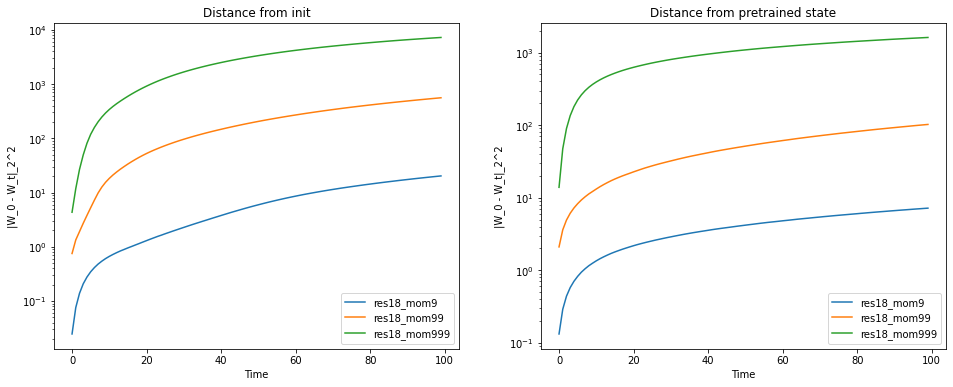

In [11]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))#, sharey=True)

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
expids = [
    "res18_mom9",
    "res18_mom99",
    "res18_mom999",
]
lr = 0.1
#d0 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expids[0]}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
#d00 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expids[0]}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
for i,expid in enumerate(expids):
    experiment = "random_initial_imagenet"
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    
    if len(d["dist_from_start"]) > 120:
        d["dist_from_start"] = d["dist_from_start"][1::2]
    d["dist_from_start"] = d["dist_from_start"]**2
    #d["dist_from_start"] /= d0["dist_from_start"]**2
    axes[0].plot(d["dist_from_start"], label=expid, color=plt.cm.tab10(i))
    axes[0].set_title("Distance from init")
    axes[0].set_ylabel("|W_0 - W_t|_2^2")
    axes[0].set_xlabel("Time")
    axes[0].set_yscale("log")
    axes[0].legend()
    
    experiment = "pretrained_imnet_dist_from_start"
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    
    if len(d["dist_from_start"]) > 120:
        d["dist_from_start"] = d["dist_from_start"][1::2]
    d["dist_from_start"] = d["dist_from_start"]**2
    #d["dist_from_start"] /= d0["dist_from_start"]**2
    axes[1].plot(d["dist_from_start"], label=expid, color=plt.cm.tab10(i))
    axes[1].set_title("Distance from pretrained state")
    axes[1].set_ylabel("|W_0 - W_t|_2^2")
    axes[1].set_xlabel("Time")
    axes[1].set_yscale("log")
    axes[1].legend()
    
    

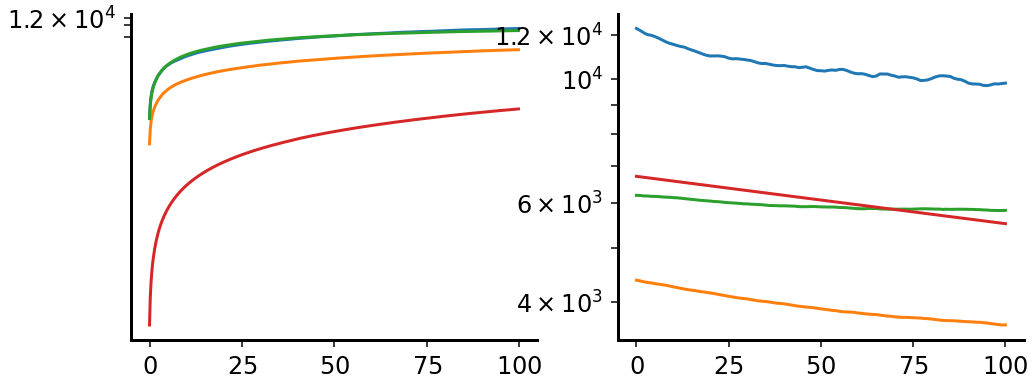

In [12]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))#, sharey=True)

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "motivating_fig"
expids = [
    "res18_cifar100_pretrained",
    "vgg16bn_cifar100_pretrained",
    "alexnet_cifar100_pretrained",
    "googlenet_cifar100_pretrained",
]
for i,expid in enumerate(expids):
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    #if len(d["dist_from_start"]) > 120:
    #    d["dist_from_start"] = d["dist_from_start"][1::2]
    d["dist_from_start"] = d["dist_from_start"]**2
    #d["dist_from_start"] /= d0["dist_from_start"]**2
    axes[0].plot(np.arange(len(d["dist_from_start"]))/5, d["dist_from_start"], 
                 label=expid, color=plt.cm.tab10(i),
                 lw=3)
    #axes[0].set_title("Squared distance from pretrained")
    #axes[0].set_ylabel("|W_0 - W_t|_2^2")
    #axes[0].set_xlabel("Epochs from pretained state")
    axes[0].set_yscale("log")
    style_axes(axes[0])    
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/weight_norm.h5")
    axes[1].plot(np.arange(len(d["weight_norm"])), d["weight_norm"]**2, 
                 label=expid, color=plt.cm.tab10(i),
                 lw=3)
    #axes[1].set_title("Squared weight norm")
    #axes[1].set_ylabel("|W_t|_2^2")
    #axes[1].set_xlabel("Epochs from pretained state")
    axes[1].set_yscale("log")
    style_axes(axes[1])
#plt.tight_layout()
plt.savefig("fig2.pdf")

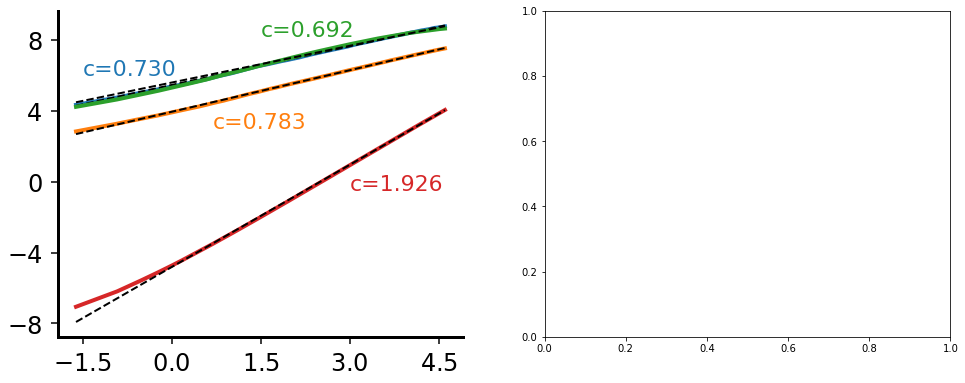

In [13]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))#, sharey=True)

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "motivating_fig"
expids = [
    "res18_cifar100_pretrained",
    "vgg16bn_cifar100_pretrained",
    "alexnet_cifar100_pretrained",
    "googlenet_cifar100_pretrained",
]
coords = [
    (-1.5,6),
    (0.7,3),
    (1.5,8.2),
    (3,-0.5),
]
for i,expid in enumerate(expids):
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    x = np.arange(len(d["dist_from_start"]))/5
    y = d["dist_from_start"]**2
    x = np.log(x[1:])
    y = np.log(y[1:])
    
    model = LinearRegression()
    model.fit(x[:, np.newaxis], y)

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = model.predict(x_fit[:, np.newaxis])
    
    axes[0].plot(x, y, 
                 label=f"{expid} fit slope: {model.coef_[0]:1.3f}", color=plt.cm.tab10(i),
                 lw=4)
    axes[0].plot(x_fit, y_fit, "k--",
                 lw=2)
    axes[0].text(coords[i][0], coords[i][1], f"c={model.coef_[0]:1.3f}", color=plt.cm.tab10(i),
                size=22)
    #axes[0].set_title("log-log squared distance from pretrained")
    #axes[0].set_ylabel("log(|W_0 - W_t|_2^2)")
    #axes[0].set_xlabel("log(Epochs from pretained state)")
    #axes[0].set_yscale("log")
    style_axes(axes[0])
    #axes[0].legend()
plt.savefig("fig2_loglog.pdf")

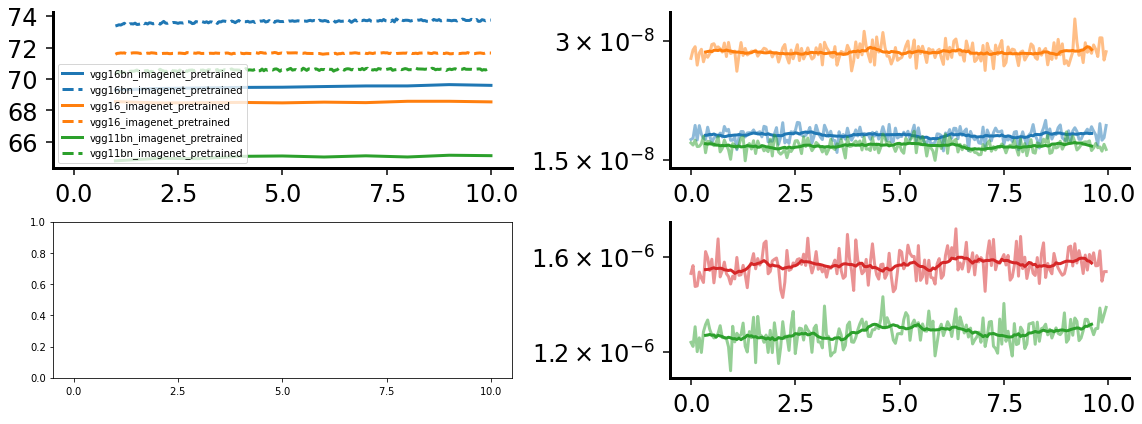

In [14]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 3 * nrows), sharex=True)

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "fig_1"
expids = [
    #"alexnet_imagenet_pretrained",
    "vgg16bn_imagenet_pretrained",
    "vgg16_imagenet_pretrained",
    "vgg11bn_imagenet_pretrained",
    #"res18_imagenet_pretrained",
    #"res34_imagenet_pretrained",
]
lrs = [0.00001, 0.00001, 0.00001]
for i,expid in enumerate(expids):
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    ax = axes[0,0]
    plot_kwargs = {"label":expid, "color": plt.cm.tab10(i), "lw": 3}
    d["train_batch_accuracy1"] = 100.0*d["train_batch_accuracy1"]/32.
    ax.plot(np.linspace(1, 10, len(d["train_accuracy1"])), d["train_accuracy1"], **plot_kwargs)
    ax.plot(np.linspace(1, 10, len(d["test_accuracy1"])), d["test_accuracy1"], ls="--", **plot_kwargs)
    #plot_moving_average(axes[0], np.linspace(1, 10, len(d["train_batch_accuracy1"])), 
    #                    d["train_batch_accuracy1"], w=50, **plot_kwargs)
    #axes[0].plot([100]*len(d["train_accuracy1"]), color="k", ls="--")
    ax.legend()
    #axes[0].set_ylim([99, 101])
    #axes[0].set_title("Accuracy")
    #axes[0].set_ylabel("Accuracy")
    #axes[0].set_xlabel("Train epoch")
    style_axes(ax)
    
    ax = axes[0,1]
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    plot_kwargs = {"label":expid, "color": plt.cm.tab10(i), "lw": 3}
    plot_moving_average(ax, np.arange(len(d["vel_norm"]))/20, (lrs[i]**2)*d["vel_norm"], w=15, **plot_kwargs)
    #axes[1].legend()
    ax.set_yscale("log")
    style_axes(ax, numyticks=1)
    ax.yaxis.set_minor_locator(plt.MaxNLocator(1))
    
expids = [
    "res18_imagenet_pretrained",
    "res34_imagenet_pretrained",
]
lrs = [0.0001, 0.0001]
for i,expid in enumerate(expids):
    ax = axes[1,1]
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    plot_kwargs = {"label":expid, "color": plt.cm.tab10(i+2), "lw": 3}
    plot_moving_average(ax, np.arange(len(d["vel_norm"]))/20, (lrs[i]**2)*d["vel_norm"], w=15, **plot_kwargs)
    #axes[1].legend()
    ax.set_yscale("log")
    style_axes(axes[1,1], numyticks=1)
    ax.yaxis.set_minor_locator(plt.MaxNLocator(1))
plt.tight_layout()
plt.savefig("fig_1_sq.pdf")

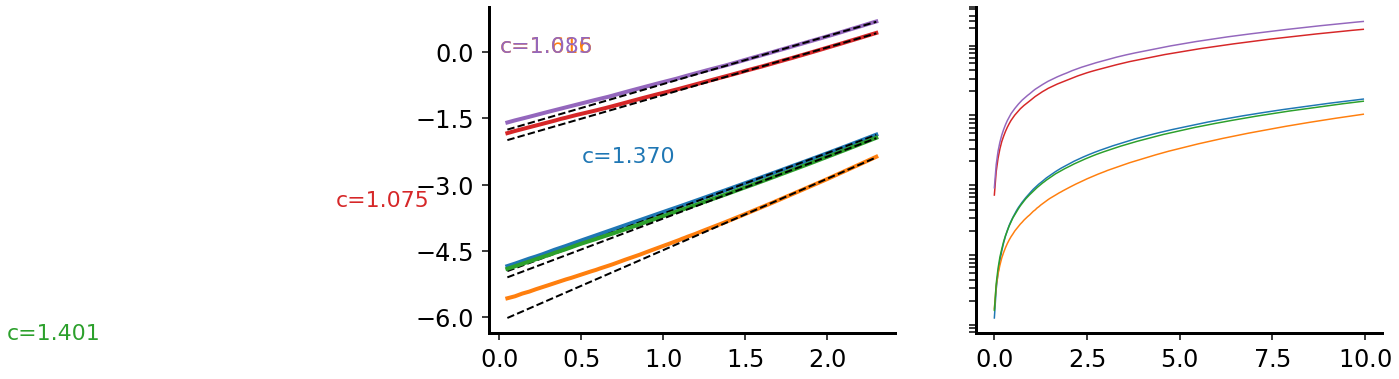

In [15]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "fig_1"
expids = [
    #"alexnet_imagenet_pretrained",
    "vgg16bn_imagenet_pretrained",
    "vgg16_imagenet_pretrained",
    "vgg11bn_imagenet_pretrained",
    "res18_imagenet_pretrained",
    "res34_imagenet_pretrained",
]
lr = 0.1
coords = [(0.5,-2.5),(0,0),(-3,-6.5),(-1,-3.5),(0,0)]
for i,expid in enumerate(expids):
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    x = np.arange(len(d["dist_from_start"]))/20
    y = d["dist_from_start"]**2
    axes[1].plot(x,y)
    axes[1].set_yscale("log")
    x = np.log(x[21:])
    y = np.log(y[21:])
    
    
    x_ = x[len(x)//3:]
    y_ = y[len(y)//3:]
    
    model = LinearRegression()
    model.fit(x_[:, np.newaxis], y_)
    

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = model.predict(x_fit[:, np.newaxis])
    
    axes[0].plot(x, y, 
                 label=f"{expid} fit slope: {model.coef_[0]:1.3f}", color=plt.cm.tab10(i),
                 lw=4)
    axes[0].plot(x_fit, y_fit, "k--",
                 lw=2)
    axes[0].text(coords[i][0], coords[i][1], f"c={model.coef_[0]:1.3f}", color=plt.cm.tab10(i),
                size=22)
    #axes[0].set_title("log-log squared distance from pretrained")
    #axes[0].set_ylabel("log(|W_0 - W_t|_2^2)")
    #axes[0].set_xlabel("log(Epochs from pretained state)")
    #axes[0].set_yscale("log")
    #axes[0].legend()
    style_axes(axes[0])
    style_axes(axes[1])
plt.savefig("fig_1_Delta.pdf")

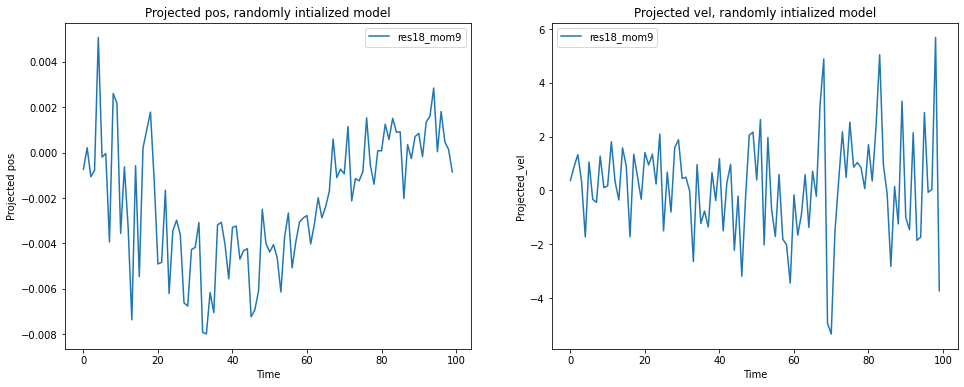

In [16]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))#, sharey=True)

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
expids = [
    "res18_mom9",
    #"res18_mom99",
    #"res18_mom999",
]
lr = 0.1
#d0 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expids[0]}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
#d00 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expids[0]}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
for i,expid in enumerate(expids):
    experiment = "random_initial_imagenet"
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    
    if len(d["projected_pos"]) > 120:
        d["projected_pos"] = d["projected_pos"][1::2]
    axes[0].plot(d["projected_pos"], label=expid, color=plt.cm.tab10(i))
    axes[0].set_title("Projected pos, randomly intialized model")
    axes[0].set_ylabel("Projected pos")
    axes[0].set_xlabel("Time")
    #axes[0].set_yscale("log")
    axes[0].legend()
    
    if len(d["projected_vel"]) > 120:
        d["projected_vel"] = d["projected_vel"][1::2]
    axes[1].plot(d["projected_vel"], label=expid, color=plt.cm.tab10(i))
    axes[1].set_title("Projected vel, randomly intialized model")
    axes[1].set_ylabel("Projected_vel")
    axes[1].set_xlabel("Time")
    #axes[1].set_yscale("log")
    axes[1].legend()
    

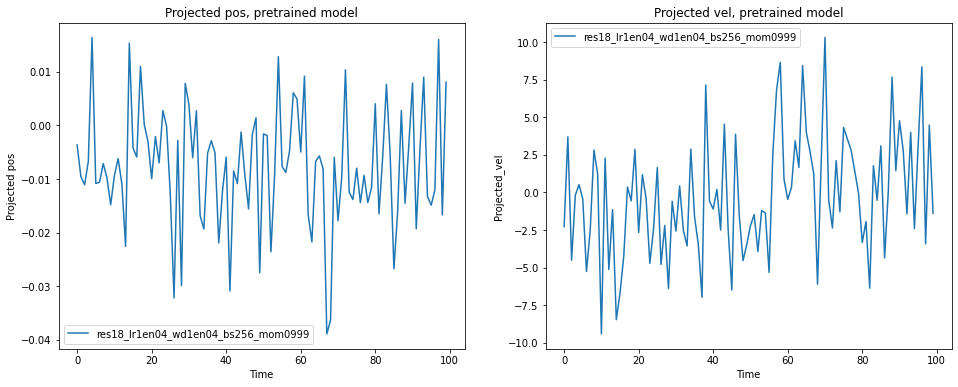

In [17]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))#, sharey=True)

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
expids = [
    #"res18_lr1en04_wd1en04_bs256_mom09",
    #"res18_lr1en04_wd1en04_bs256_mom099",
    "res18_lr1en04_wd1en04_bs256_mom0999",
]
lr = 0.1
#d0 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expids[0]}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
#d00 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expids[0]}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
for i,expid in enumerate(expids):
    experiment = "pretrained_imnet_dist_grad_proj"
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    
    if len(d["projected_pos"]) > 120:
        d["projected_pos"] = d["projected_pos"][1::2]
    axes[0].plot(d["projected_pos"], label=expid, color=plt.cm.tab10(i))
    axes[0].set_title("Projected pos, pretrained model")
    axes[0].set_ylabel("Projected pos")
    axes[0].set_xlabel("Time")
    #axes[0].set_yscale("log")
    axes[0].legend()
    
    if len(d["projected_vel"]) > 120:
        d["projected_vel"] = d["projected_vel"][1::2]
    axes[1].plot(d["projected_vel"], label=expid, color=plt.cm.tab10(i))
    axes[1].set_title("Projected vel, pretrained model")
    axes[1].set_ylabel("Projected_vel")
    axes[1].set_xlabel("Time")
    #axes[1].set_yscale("log")
    axes[1].legend()
    

## Hyperparam sweep with lean ckpt

 python train.py --experiment lean_sweep --expid res18_ --save-dir gs://jv_neural_mechanics --dataset imagenet --data-dir /home/jvrsgsty/data --model-dir /home/jvrsgsty/models --model resnet18 --model-class imagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 2 --save-freq 1 --train-batch-size 32 --lr 1e-04 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-05 --overwrite -v --pretrained True --lean-ckpt True --workers 8


In [18]:
lrs = [1e-4, 1e-3, 1e-5]
wds = [1e-4]
bss = [128, 256, 512]
momentums = [0.8, 0.9, 0.99]
filename = "lean_sweep"
EXPS_PER_FILE = 9
num_exps = 0
tpu_idx = 5
expids = []
f = open(f"{filename}_{tpu_idx}.sh","w+")
f.write("#!/bin/bash \n \n")
for lr,wd,bs,momentum in itertools.product(lrs, wds, bss, momentums):
    lr_= f"{lr:1.0e}".replace("-","n")
    wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    expids.append(expid)
    #print(f"gsutil ls gs://jv_neural_mechanics/lean_sweep/{expid}/ckpt | wc -l")
    #print(f"python cache.py --metrics performance_from_ckpt --experiment lean_sweep "
    #      f"--expid {expid} --overwrite --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics" )
    #print(num_exps, expid)
    command = (f"python train.py --experiment lean_sweep "
               f"--expid {expid} --save-dir gs://jv_neural_mechanics "
               f"--dataset imagenet --data-dir /home/jvrsgsty/data "
               f"--model-dir /home/jvrsgsty/models --model resnet18 --model-class imagenet "
               f"--loss ce --optimizer custom_sgd --test-batch-size 256 --train-batch-size {bs//8} "
               f"--epochs 2 --save-freq 1 --lr {lr} --wd {wd} --momentum {momentum} "
               f"--overwrite --pretrained True --lean-ckpt True --tpu jv-pt-tpu-0{tpu_idx} --workers 8")
    f.write(command)
    f.write("\n\n")
    num_exps += 1
    if num_exps >= EXPS_PER_FILE:
        tpu_idx += 1
        num_exps = 0
        f.close()
        f = open(f"{filename}_{tpu_idx}.sh","w+")
        f.write("#!/bin/bash \n \n")
f.close()

base res18_lr1en04_wd1en04_mom09_bs256


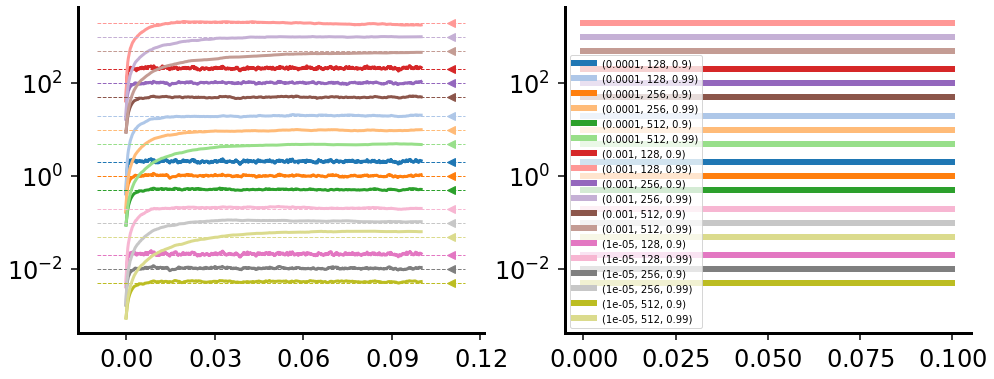

In [540]:
# sampling on consecutive steps, 5 times an epoch
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows), sharey=True)
k = 0
CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "lean_sweep"

expid = expids[4]
print("base", expid)
bs = int(expid.split("bs")[1])
lr = float(expid.split("lr")[1].split("_")[0].replace("n","-"))
mom = float(expid.split("mom")[1].split("_")[0].replace("0","0."))
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
y = (lr**2)*d["vel_norm"][k:]
y_theory_base = lr**2 / (bs * (1-mom**2))
base_mean = np.mean(y)
min_y = 1000
max_y = 0
expids_ = [e for e in expids if "mom08" not in e]
for i,expid in enumerate(expids_):
    bs = int(expid.split("bs")[1])
    lr = float(expid.split("lr")[1].split("_")[0].replace("n","-"))
    mom = float(expid.split("mom")[1].split("_")[0].replace("0","0."))
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    lr_idx = i//9
    bs_idx = (i%9) // 3 
    mom_idx = i%3
    
    colors = [0,1,2]
    styles = [":", "--", "-"]
    opacity = [1, 0.8, 0.5]
    
    #plot_kwargs = {"color": plt.cm.tab120(colors[lr_idx]),"ls": styles[bs_idx], 
    #               "alpha": opacity[mom_idx], "lw": 3, }
    plot_kwargs = {"color": plt.cm.tab20(i), "lw": 3, }
    
    x = np.linspace(0,0.1,len(d["vel_norm"][k:])//2//10)
    y = ((lr**2)*d["vel_norm"][:len(d["vel_norm"])//2//10]) / base_mean
    min_y = min(min_y, min(y))
    max_y = max(max_y, max(y))
    y_theory = lr**2 / (bs * (1-mom**2)) / y_theory_base

    #plot_moving_average(axes[0], x, y, w=20, **plot_kwargs)
    axes[0].plot(x, y, label=f"({lr}, {bs}, {mom})", **plot_kwargs)
    #axes[1].set_ylim([0, 1])
    #axes[1].set_title("Cifar100 |theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_ylabel("|theta_{k+1} - theta_{k}|_2^2")
    #axes[1].set_xlabel("Train epoch")
    axes[0].set_yscale("log")
    
    #axes[0].plot(np.linspace(-0.05,1.15,2), [23]*2, "k", lw=1)
    #axes[0].plot(np.linspace(-0.05,1.15,2), [0.24]*2, "k", lw=1)
    plot_kwargs["lw"] = 1
    axes[0].plot(np.linspace(-0.01,0.115,2), [y_theory]*2, "--", **plot_kwargs)
    plot_kwargs["lw"] = 6
    axes[0].plot(0.11, y_theory, "<", markersize=8, **plot_kwargs)
    
    style_axes(axes[0])
    
    axes[1].plot(x, y_theory*np.ones_like(x), label=f"({lr}, {bs}, {mom})", **plot_kwargs)
    axes[1].set_yscale("log")
    style_axes(axes[1])
    axes[1].legend()
#axes[0].plot([2.1]*2, np.linspace(min_y, max_y, 2), "k--")
plt.savefig("delta-local-sweep.pdf")

# TODO: labels in legend BS, LR, MOM
# TODO: highlight the default hyperparams

base res18_lr1en04_wd1en04_mom09_bs256


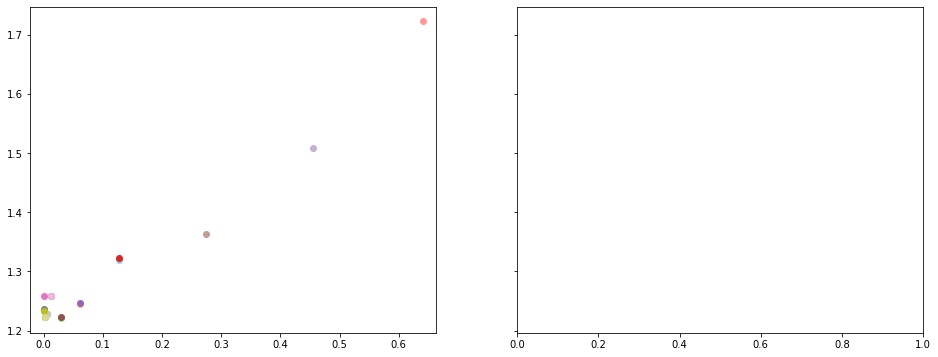

In [820]:
# sampling on consecutive steps, 5 times an epoch
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows), sharey=True)
k = 0
CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "lean_sweep"

expid = expids[4]
print("base", expid)
bs = int(expid.split("bs")[1])
lr = float(expid.split("lr")[1].split("_")[0].replace("n","-"))
mom = float(expid.split("mom")[1].split("_")[0].replace("0","0."))
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
y = (lr**2)*d["vel_norm"][k:]
y_theory_base = lr**2 / (bs * (1-mom**2))
base_mean = np.mean(y)
min_y = 1000
max_y = 0
expids_ = [e for e in expids if "mom08" not in e]
for i,expid in enumerate(expids_):
    bs = int(expid.split("bs")[1])
    lr = float(expid.split("lr")[1].split("_")[0].replace("n","-"))
    mom = float(expid.split("mom")[1].split("_")[0].replace("0","0."))
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    train_loss = d["train_loss"][-1]
    test_loss = d["test_loss"][-1]
    
    d2 = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    vel_norm = np.mean(d2["vel_norm"][len(d2["vel_norm"])//2:])*(lr**2)

    ratio = (1+mom)/(4*lr)
    
    axes[0].scatter(ratio*vel_norm, test_loss, color=plt.cm.tab20(i))
    axes[0].axis("equal")
    #axes[0].set_yscale("log")
    #axes[0].set_xscale("log")
    
    #print(f"({lr}, {bs}, {mom})", d["train_loss"][-1])
    #print(f"({lr}, {bs}, {mom})", d["test_loss"][-1])
    #print("===")

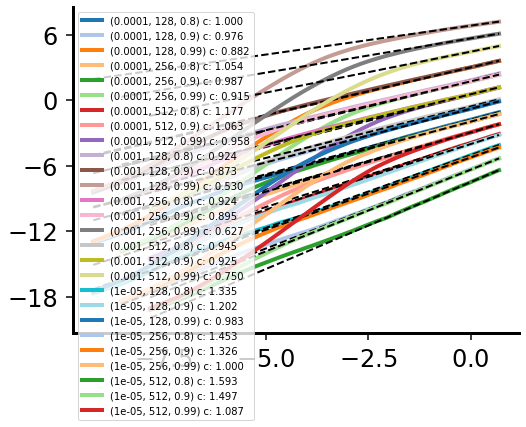

In [821]:
# sampling on consecutive steps, 5 times an epoch
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
k = 0
CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "lean_sweep"

expid = expids[4]
bs = int(expid.split("bs")[1])
lr = float(expid.split("lr")[1].split("_")[0].replace("n","-"))
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
y = (lr**2)*d["vel_norm"][k:]**2
base_mean = np.mean(y)

for i,expid in enumerate(expids):
    bs = int(expid.split("bs")[1])
    lr = float(expid.split("lr")[1].split("_")[0].replace("n","-"))
    mom = float(expid.split("mom")[1].split("_")[0].replace("0","0."))
    
    ax = axes
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    x = np.linspace(0,2,len(d["dist_from_start"]))
    y = d["dist_from_start"]**2
    x = np.log(x[1:])#[k:]
    #x = np.log(np.arange(1, -k+1))
    y = np.log(y[1:])#[k:]
    
    x_ = x[len(x)//2:]
    y_ = y[len(y)//2:]
    
    model = LinearRegression()
    model.fit(x_[:, np.newaxis], y_)

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = model.predict(x_fit[:, np.newaxis])
    
    ax.plot(x, y, 
                 label=f"({lr}, {bs}, {mom}) c: {model.coef_[0]:1.3f}", color=plt.cm.tab20(i%20),
                 lw=4)
    ax.plot(x_fit, y_fit, "k--",
                 lw=2)
    ax.legend()
    style_axes(ax)
plt.savefig("delta-global-sweep.pdf")

## Sweep to get shapes of curves of hyperparams dependencies?

In [899]:
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
lrs = np.linspace(1e-3, 1e-5, 20)
filename = "lean_sweep_lr"
EXPS_PER_FILE = 7
num_exps = 0
tpu_idx = 1
expids = []
f = open(f"{filename}_{tpu_idx}.sh","w+")
f.write("#!/bin/bash \n \n")
for lr in lrs:
    lr_= f"{lr:1.2e}".replace("-","n").replace(".","d")
    wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    expids.append(expid)
    #print(f"gsutil ls gs://jv_neural_mechanics/lean_sweep/{expid}/ckpt | wc -l")
    #print(f"python cache.py --metrics loss_diff_from_ckpt,dist_from_start_from_ckpt,performance_from_ckpt --experiment lean_sweep_3 "
    #      f"--expid {expid} --overwrite --save-dir /home/jvrsgsty" )
    #print(num_exps, expid)
    command = (f"python train.py --experiment lean_sweep_3 "
               f"--expid {expid} --save-dir /home/jvrsgsty "
               f"--dataset imagenet --data-dir /home/jvrsgsty/data "
               f"--model-dir /home/jvrsgsty/models --model resnet18 --model-class imagenet "
               f"--loss ce --optimizer custom_sgd --test-batch-size 256 --train-batch-size {bs//8} "
               f"--epochs 2 --save-freq 1 --save-begin-epoch 1 --lr {lr} --wd {wd} --momentum {momentum} "
               f"--overwrite --pretrained True --lean-ckpt True --tpu jv-pt-tpu-0{tpu_idx} --workers 8")
    f.write(command)
    f.write("\n\n")
    num_exps += 1
    if num_exps >= EXPS_PER_FILE:
        tpu_idx += 1
        num_exps = 0
        f.close()
        f = open(f"{filename}_{tpu_idx}.sh","w+")
        f.write("#!/bin/bash \n \n")
f.close()

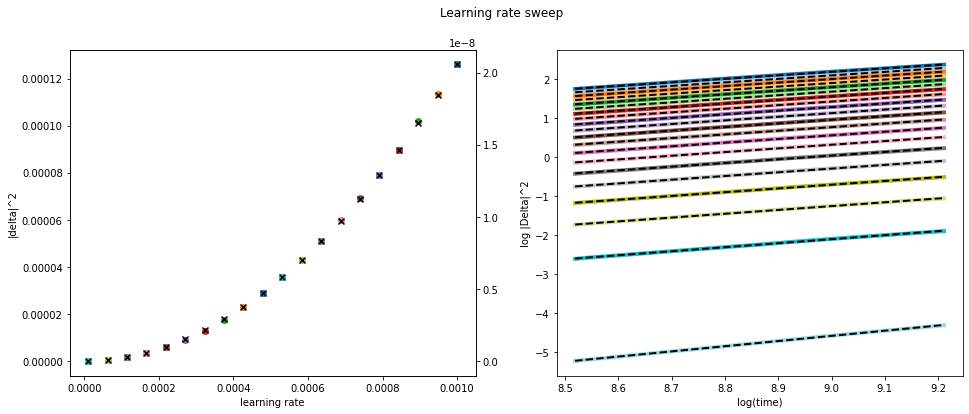

In [935]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
fig.suptitle("Learning rate sweep")
ax2 = axes[0].twinx()

lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
lrs = np.linspace(1e-3, 1e-5, 20)#[[0,1,4,6,8,10,12,14,16,17,18,19]]
experiment = "lean_sweep_2"
experiment = "lean_sweep_3"
lr_deltas = []
lr_Delta_slopes = []
lr_Delta_intercepts = []
lr_performance = []
for i,lr in enumerate(lrs):
    ax = axes[0]
    lr_= f"{lr:1.0e}".replace("-","n")
    lr_= f"{lr:1.2e}".replace("-","n").replace(".","d")
    wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    ax.scatter(lr, (lr**2)*d["vel_norm"][-1])
    y_theory = lr**2 / (bs * (1-momentum**2)) #/ y_theory_base
    ax2.scatter(lr, y_theory, marker="x", color="k")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("|delta|^2")
    lr_deltas.append((lr**2)*d["vel_norm"][-1])
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    steps = d["step"][2:-1]
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    ax = axes[1]
    x = steps
    y = d["dist_from_start"]**2
    x = np.log(x[1:])#[k:]
    #x = np.log(np.arange(1, -k+1))
    y = np.log(y[1:])#[k:]
    
    x_ = x#[len(x)//2:]
    y_ = y#[len(y)//2:]
    
    model = LinearRegression()
    model.fit(x_[:, np.newaxis], y_)

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = model.predict(x_fit[:, np.newaxis])
    
    ax.plot(x, y, 
                 label=f"({lr}, {bs}, {momentum}) c: {model.coef_[0]:1.3f}", color=plt.cm.tab20(i%20),
                  lw=4)
    ax.plot(x_fit, y_fit, "k--",
                 lw=2)
    ax.set_xlabel("log(time)")
    ax.set_ylabel("log |Delta|^2")
    
    
    #ax.scatter(lr, model.coef_[0], color=plt.cm.tab20(i%20), label=expid)
    #ax.scatter(lr, model.intercept_, color=plt.cm.tab20(i%20), label=expid)
    #ax.set_xlabel("learning_rate")
    #ax.set_ylabel("c")
    #ax.legend()
    
    lr_Delta_slopes.append(model.coef_[0])
    lr_Delta_intercepts.append(model.intercept_)
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    performance = d["test_loss"][-1]
    lr_performance.append(performance)

In [784]:
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
bss = np.linspace(32, 1024, 20)
bss = [int(bs) for bs in bss]
filename = "lean_sweep_bs"
EXPS_PER_FILE = 7
num_exps = 0
tpu_idx = 4
expids = []
f = open(f"{filename}_{tpu_idx}.sh","w+")
f.write("#!/bin/bash \n \n")
for bs in bss:
    lr_= f"{lr:1.2e}".replace("-","n").replace(".","d")
    wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    expids.append(expid)
    #print(f"gsutil ls gs://jv_neural_mechanics/lean_sweep/{expid}/ckpt | wc -l")
    #print(f"python cache.py --metrics loss_diff_from_ckpt,dist_from_start_from_ckpt,performance_from_ckpt --experiment lean_sweep_3 "
    #      f"--expid {expid} --overwrite --save-dir /home/jvrsgsty" )
    #print(num_exps, expid)
    command = (f"python train.py --experiment lean_sweep_3 "
               f"--expid {expid} --save-dir /home/jvrsgsty "
               f"--dataset imagenet --data-dir /home/jvrsgsty/data "
               f"--model-dir /home/jvrsgsty/models --model resnet18 --model-class imagenet "
               f"--loss ce --optimizer custom_sgd --test-batch-size 256 --train-batch-size {bs//8} "
               f"--epochs 2 --save-freq 1 --save-begin-epoch 1 --lr {lr} --wd {wd} --momentum {momentum} "
               f"--overwrite --pretrained True --lean-ckpt True --tpu jv-pt-tpu-0{tpu_idx} --workers 8")
    f.write(command)
    f.write("\n\n")
    num_exps += 1
    if num_exps >= EXPS_PER_FILE:
        tpu_idx += 1
        num_exps = 0
        f.close()
        f = open(f"{filename}_{tpu_idx}.sh","w+")
        f.write("#!/bin/bash \n \n")
f.close()

32 40036 [40038. 40039. 40040. ... 80071. 80072. 80073.]
84 16014 [16016. 16017. 16018. ... 32027. 32028. 32029.]
136 9420 [ 9422.  9423.  9424. ... 18839. 18840. 18841.]
188 6962 [ 6964.  6965.  6966. ... 13923. 13924. 13925.]
240 5338 [ 5340.  5341.  5342. ... 10675. 10676. 10677.]
293 4448 [4450. 4451. 4452. ... 8895. 8896. 8897.]
345 3724 [3726. 3727. 3728. ... 7447. 7448. 7449.]
397 3268 [3270. 3271. 3272. ... 6535. 6536. 6537.]
449 2859 [2861. 2862. 2863. ... 5717. 5718. 5719.]
501 2582 [2584. 2585. 2586. ... 5163. 5164. 5165.]
554 2320 [2322. 2323. 2324. ... 4639. 4640. 4641.]
606 2135 [2137. 2138. 2139. ... 4269. 4270. 4271.]
658 1952 [1954. 1955. 1956. ... 3903. 3904. 3905.]
710 1819 [1821. 1822. 1823. ... 3637. 3638. 3639.]
762 1685 [1687. 1688. 1689. ... 3369. 3370. 3371.]
815 1585 [1587. 1588. 1589. ... 3169. 3170. 3171.]
867 1482 [1484. 1485. 1486. ... 2963. 2964. 2965.]
919 1404 [1406. 1407. 1408. ... 2807. 2808. 2809.]
971 1323 [1325. 1326. 1327. ... 2645. 2646. 2647.]
1

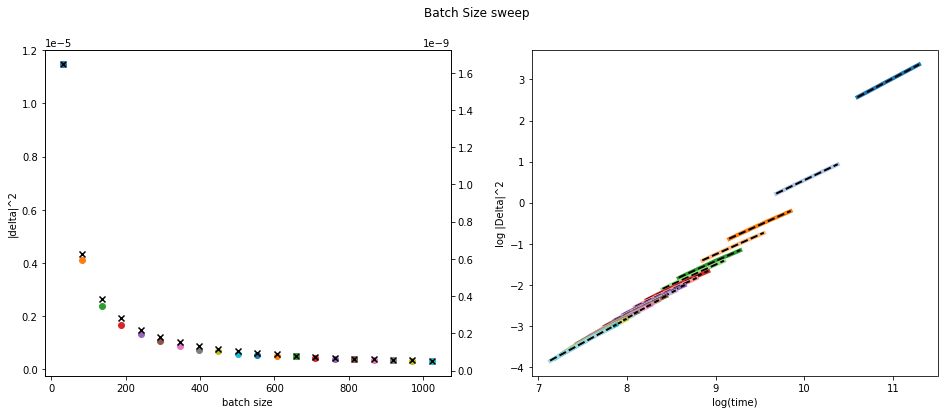

In [936]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
fig.suptitle("Batch Size sweep")
ax2 = axes[0].twinx()
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
bss = np.linspace(32, 1024, 20)
bss = np.array([int(bs) for bs in bss])
experiment = "lean_sweep_2"
experiment = "lean_sweep_3"
bs_deltas = []
bs_Delta_slopes = []
bs_Delta_intercepts = []
bs_performance = []
for i,bs in enumerate(bss):
    ax = axes[0]
    lr_= f"{lr:1.0e}".replace("-","n")
    lr_= f"{lr:1.2e}".replace("-","n").replace(".","d")
    wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    ax.scatter(bs, (lr**2)*d["vel_norm"][-1])
    y_theory = lr**2 / (bs * (1-momentum**2)) #/ y_theory_base
    ax2.scatter(bs, y_theory, marker="x", color="k")
    ax.set_xlabel("batch size")
    ax.set_ylabel("|delta|^2")
    bs_deltas.append((lr**2)*d["vel_norm"][-1])
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    steps = d["step"][2:-1]
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    ax = axes[1]
    x = steps
    print(bs, len(steps), steps)
    y = d["dist_from_start"]**2
    x = np.log(x[1:])#[k:]
    #x = np.log(np.arange(1, -k+1))
    y = np.log(y[1:])#[k:]
    
    x_ = x#[len(x)//2:]
    y_ = y#[len(y)//2:]
    
    model = LinearRegression()
    model.fit(x_[:, np.newaxis], y_)

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = model.predict(x_fit[:, np.newaxis])
    
    ax.plot(x, y, 
                 label=f"({lr}, {bs}, {mom}) c: {model.coef_[0]:1.3f}", color=plt.cm.tab20(i%20),
                 lw=4)
    ax.plot(x_fit, y_fit, "k--",
                 lw=2)
    ax.set_xlabel("log(time)")
    ax.set_ylabel("log |Delta|^2")
    
    #ax.scatter(bs, model.coef_[0], color=plt.cm.tab20(i%20), label=expid)
    #ax.scatter(bs, model.intercept_, color=plt.cm.tab20(i%20), label=expid)
    #ax.set_xlabel("batch size")
    #ax.set_ylabel("c")
    #ax.legend()
    
    bs_Delta_slopes.append(model.coef_[0])
    bs_Delta_intercepts.append(model.intercept_)
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    performance = d["test_loss"][-1]
    bs_performance.append(performance)

In [785]:
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
moms = np.linspace(0.8, 0.99, 20)
filename = "lean_sweep_mom"
EXPS_PER_FILE = 4
num_exps = 0
tpu_idx = 1
expids = []
f = open(f"{filename}_{tpu_idx}.sh","w+")
f.write("#!/bin/bash \n \n")
for momentum in moms:
    lr_= f"{lr:1.2e}".replace("-","n").replace(".","d")
    wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    expids.append(expid)
    #print(f"gsutil ls gs://jv_neural_mechanics/lean_sweep/{expid}/ckpt | wc -l")
    #print(f"python cache.py --metrics loss_diff_from_ckpt,dist_from_start_from_ckpt,performance_from_ckpt --experiment lean_sweep_3 "
    #      f"--expid {expid} --overwrite --save-dir /home/jvrsgsty" )
    #print(num_exps, expid)
    command = (f"python train.py --experiment lean_sweep_3 "
               f"--expid {expid} --save-dir /home/jvrsgsty "
               f"--dataset imagenet --data-dir /home/jvrsgsty/data "
               f"--model-dir /home/jvrsgsty/models --model resnet18 --model-class imagenet "
               f"--loss ce --optimizer custom_sgd --test-batch-size 256 --train-batch-size {bs//8} "
               f"--epochs 2 --save-freq 1 --save-begin-epoch 1 --lr {lr} --wd {wd} --momentum {momentum} "
               f"--overwrite --pretrained True --lean-ckpt True --tpu jv-pt-tpu-0{tpu_idx} --workers 8")
    f.write(command)
    f.write("\n\n")
    num_exps += 1
    if num_exps >= EXPS_PER_FILE:
        tpu_idx += 1
        num_exps = 0
        f.close()
        f = open(f"{filename}_{tpu_idx}.sh","w+")
        f.write("#!/bin/bash \n \n")
f.close()

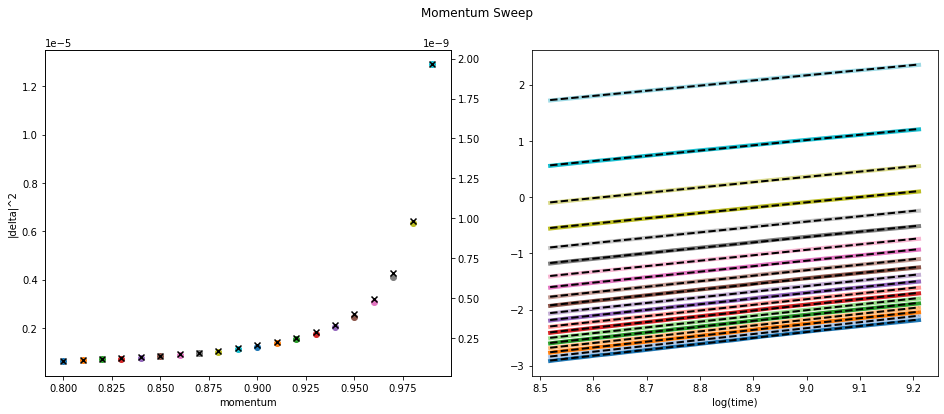

In [937]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
fig.suptitle("Momentum Sweep")
ax2 = axes[0].twinx()
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
moms = np.linspace(0.8, 0.99, 20)
mom_deltas = []
mom_Delta_slopes = []
mom_Delta_intercepts = []
mom_performance = []
experiment = "lean_sweep_2"
experiment = "lean_sweep_3"
for i,momentum in enumerate(moms):
    ax = axes[0]
    lr_= f"{lr:1.0e}".replace("-","n")
    lr_= f"{lr:1.2e}".replace("-","n").replace(".","d")
    wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    ax.scatter(momentum, (lr**2)*d["vel_norm"][-1])
    y_theory = lr**2 / (bs * (1-momentum**2)) #/ y_theory_base
    ax2.scatter(momentum, y_theory, marker="x", color="k")
    ax.set_xlabel("momentum")
    ax.set_ylabel("|delta|^2")
    mom_deltas.append((lr**2)*d["vel_norm"][-1])
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    steps = d["step"][2:-1]
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    ax = axes[1]
    x = steps
    y = d["dist_from_start"]**2
    x = np.log(x[1:])#[k:]
    #x = np.log(np.arange(1, -k+1))
    y = np.log(y[1:])#[k:]
    
    x_ = x#[len(x)//2:]
    y_ = y#[len(y)//2:]
    
    model = LinearRegression()
    model.fit(x_[:, np.newaxis], y_)

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = model.predict(x_fit[:, np.newaxis])
    
    ax.plot(x, y, 
                 label=f"({lr}, {bs}, {momentum}) c: {model.coef_[0]:1.3f}", color=plt.cm.tab20(i%20),
                 lw=4)
    ax.plot(x_fit, y_fit, "k--",
                 lw=2)
    ax.set_xlabel("log(time)")
    
    #ax.scatter(momentum, model.coef_[0], color=plt.cm.tab20(i%20), label=expid)
    #ax.scatter(momentum, model.intercept_, color=plt.cm.tab20(i%20), label=expid)
    #ax.set_xlabel("momentum")
    #ax.set_ylabel("c")
    #ax.legend()
    
    mom_Delta_slopes.append(model.coef_[0])
    mom_Delta_intercepts.append(model.intercept_)
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    performance = d["test_loss"][-1]
    mom_performance.append(performance)

In [902]:
d.keys()

dict_keys(['step', 'test_accuracy1', 'test_accuracy5', 'test_loss', 'train_accuracy1', 'train_accuracy5', 'train_batch_accuracy1', 'train_batch_accuracy5', 'train_loss'])

ValueError: x and y must be the same size

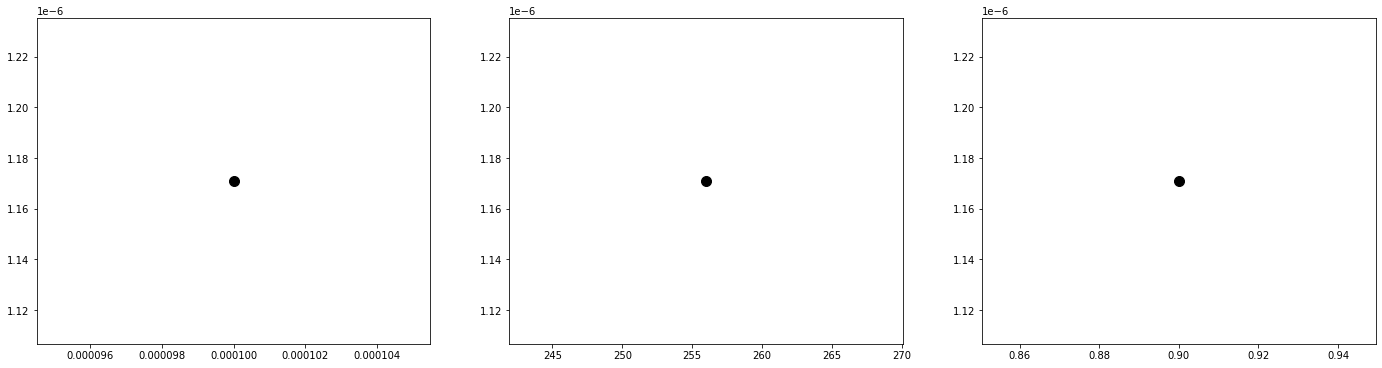

In [900]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
lrs = np.linspace(1e-3, 1e-5, 20)[[0,1,4,6,8,10,12,14,16,17,18,19]]
bss = np.linspace(32, 1024, 20)
bss = np.array([int(bs) for bs in bss])
moms = np.linspace(0.8, 0.99, 20)

lr_= f"{lr:1.0e}".replace("-","n")
wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
mom_ = f"{momentum}".replace(".", "")
experiment = "lean_sweep_2"
expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")

default_vel_norm = (lr**2)*d["vel_norm"][-1]
y_theory = lr**2 / (bs * (1-momentum**2))
sigma_tr_H = default_vel_norm / y_theory
axes[0].scatter(lr, (lr**2)*d["vel_norm"][-1], color="k", s=100, zorder=300)
axes[1].scatter(bs, (lr**2)*d["vel_norm"][-1], color="k", s=100, zorder=300)
axes[2].scatter(momentum, (lr**2)*d["vel_norm"][-1], color="k", s=100, zorder=300)

ax = axes[0]
axes[0].scatter(lrs, lr_deltas, color=plt.cm.tab10(0), s=100, zorder=200)
lrs = np.linspace(min(lrs), max(lrs), 100)
y_theory = lrs**2 / (bs * (1-momentum**2))*sigma_tr_H 
ax.plot(lrs, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)

ax = axes[1]
ax.scatter(bss, bs_deltas, color=plt.cm.tab10(1), s=100, zorder=200)
bss = np.linspace(min(bss), max(bss), 100)
y_theory = lr**2 / (bss * (1-momentum**2))*sigma_tr_H 
ax.plot(bss, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)


ax = axes[2]
ax.scatter(moms, mom_deltas, color=plt.cm.tab10(2), s=100, zorder=200)
moms_ = np.linspace(min(moms), max(moms), 100)
y_theory = lr**2 / (bs * (1-moms_**2))*sigma_tr_H
ax.plot(moms_, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)

plt.tight_layout()
plt.savefig("hyperparam_relation.pdf")

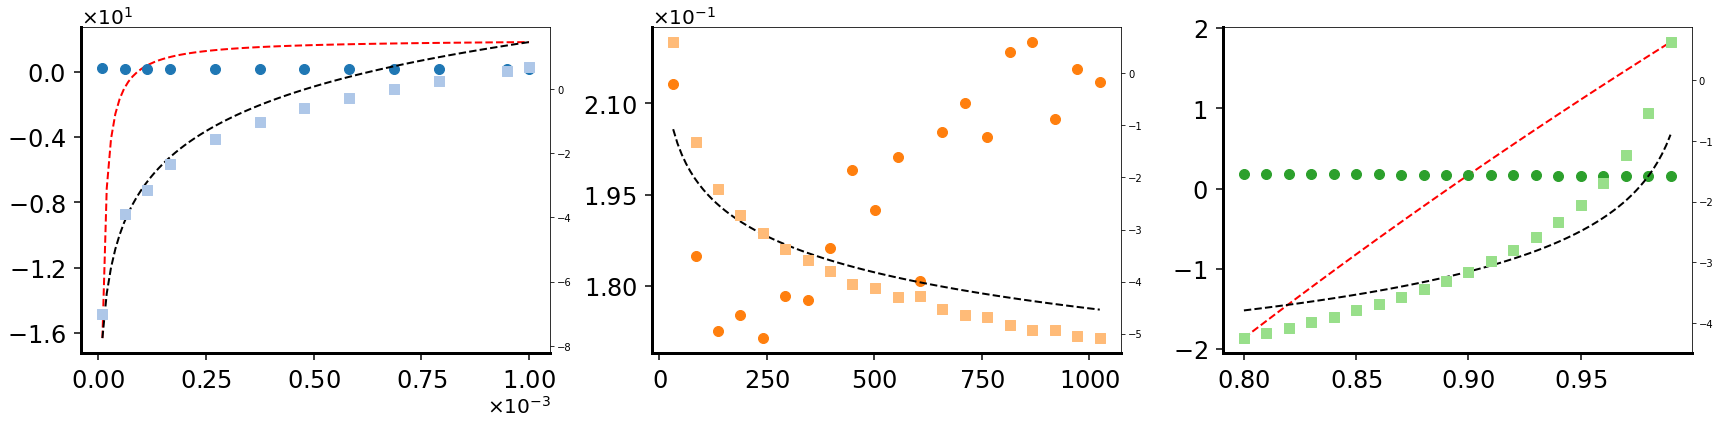

In [777]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
lrs = np.linspace(1e-3, 1e-5, 20)[[0,1,4,6,8,10,12,14,16,17,18,19]]
bss = np.linspace(32, 1024, 20)
bss = np.array([int(bs) for bs in bss])
moms = np.linspace(0.8, 0.99, 20)

lr_= f"{lr:1.0e}".replace("-","n")
wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
mom_ = f"{momentum}".replace(".", "")
experiment = "lean_sweep_2"
expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
x = np.arange(0,len(d["dist_from_start"]))
y = d["dist_from_start"]**2
x = np.log(x[1:])
y = np.log(y[1:])
x_ = x[len(x)//2:]
y_ = y[len(y)//2:]
model = LinearRegression()
model.fit(x_[:, np.newaxis], y_)
default_intercept = model.intercept_
default_coef = 2 - model.coef_[0]

lr_intercept_theory = np.log(lr**2)
lr_coef_theory = 1/lr
lr_intercept_const = default_intercept - lr_intercept_theory
lr_coef_const = default_coef / lr_coef_theory

bs_intercept_theory = np.log(1 / bs)
bs_intercept_const = default_intercept - bs_intercept_theory

mom_intercept_theory = np.log(1 / (1-momentum**2))
mom_coef_theory = (1-momentum)/(1+momentum)
mom_intercept_const = default_intercept - mom_intercept_theory
mom_coef_const = default_coef / mom_coef_theory

ax = axes[0]
ax2 = ax.twinx()
ax.scatter(lrs, lr_Delta_slopes, color=plt.cm.tab20(0), s=100, marker="o", zorder=200)
ax2.scatter(lrs, lr_Delta_intercepts, color=plt.cm.tab20(1), s=100, marker="s", zorder=200)
lrs = np.linspace(min(lrs), max(lrs), 100)
y_theory = 1/lrs * lr_coef_const
y_theory = 2 - y_theory
ax.plot(lrs, y_theory, "r--", lw=2)
y_theory = np.log(lrs**2) + lr_intercept_const 
ax2.plot(lrs, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)

ax = axes[1]
ax2 = ax.twinx()
ax.scatter(bss, bs_Delta_slopes, color=plt.cm.tab20(2), s=100, marker="o", zorder=200)
ax2.scatter(bss, bs_Delta_intercepts, color=plt.cm.tab20(3), s=100, marker="s", zorder=200)
bss = np.linspace(min(bss), max(bss), 100)
y_theory = np.log(1 / bss) + bs_intercept_const
ax2.plot(bss, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)


ax = axes[2]
ax2 = ax.twinx()
ax.scatter(moms, mom_Delta_slopes, color=plt.cm.tab20(4), s=100, marker="o", zorder=200)
ax2.scatter(moms, mom_Delta_intercepts, color=plt.cm.tab20(5), s=100, marker="s", zorder=200)
moms_ = np.linspace(min(moms), max(moms), 100)
y_theory = (1-moms_) / (1+moms_) * mom_coef_const
y_theory = 2 - y_theory
ax.plot(moms_, y_theory, "r--", lw=2)
y_theory = np.log(1 / (1-moms_**2)) + mom_intercept_const
ax2.plot(moms_, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)

plt.tight_layout()
plt.savefig("hyperparam_relation.pdf")

In [519]:
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
wds = [1e-4, 1e-3, 1e-2, 1e-1, 1]
filename = "lean_sweep_wd"
EXPS_PER_FILE = 20
num_exps = 0
tpu_idx = 9
expids = []
f = open(f"{filename}_{tpu_idx}.sh","w+")
f.write("#!/bin/bash \n \n")
for wd in wds:
    lr_= f"{lr:1.0e}".replace("-","n")
    wd_= f"{wd:1.0e}".replace("-","n").replace("+", "p") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    expids.append(expid)
    #print(f"gsutil ls gs://jv_neural_mechanics/lean_sweep/{expid}/ckpt | wc -l")
    #print(f"python cache.py --metrics loss_diff_from_ckpt,dist_from_start_from_ckpt,performance_from_ckpt --experiment lean_sweep_2 "
    #      f"--expid {expid} --overwrite --save-dir /home/jvrsgsty" )
    #print(num_exps, expid)
    command = (f"python train.py --experiment lean_sweep_2 "
               f"--expid {expid} --save-dir gs://jv_neural_mechanics "
               f"--dataset imagenet --data-dir /home/jvrsgsty/data "
               f"--model-dir /home/jvrsgsty/models --model resnet18 --model-class imagenet "
               f"--loss ce --optimizer custom_sgd --test-batch-size 256 --train-batch-size {bs//8} "
               f"--epochs 1 --save-freq 1 --save-begin-epoch 0.75 --lr {lr} --wd {wd} --momentum {momentum} "
               f"--overwrite --pretrained True --lean-ckpt True --tpu jv-pt-tpu-0{tpu_idx} --workers 8")
    f.write(command)
    f.write("\n\n")
    num_exps += 1
    if num_exps >= EXPS_PER_FILE:
        tpu_idx += 1
        num_exps = 0
        f.close()
        f = open(f"{filename}_{tpu_idx}.sh","w+")
        f.write("#!/bin/bash \n \n")
f.close()

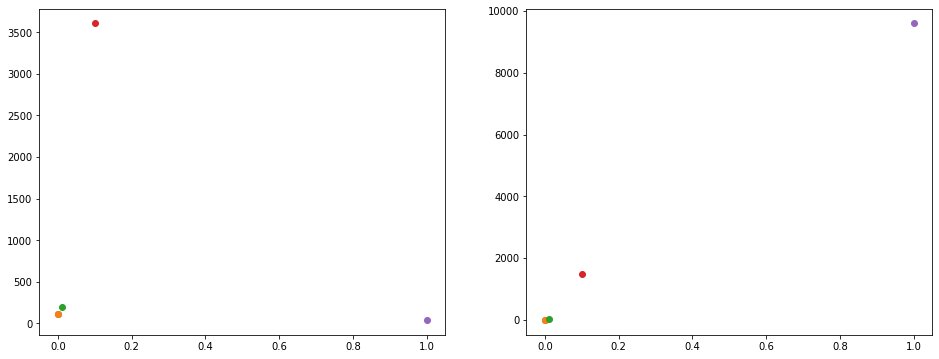

In [548]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
wds = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1])
experiment = "lean_sweep_2"
for wd in wds:
    lr_= f"{lr:1.0e}".replace("-","n")
    wd_= f"{wd:1.0e}".replace("-","n").replace("+","p") if wd > 0 else "0"
    mom_ = f"{momentum}".replace(".", "")
    expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")
    axes[0].scatter(wd, d["vel_norm"][-1])
    
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
    axes[1].scatter(wd, d["dist_from_start"][-1]**2)

## New, longer sweep Lean Sweep 3

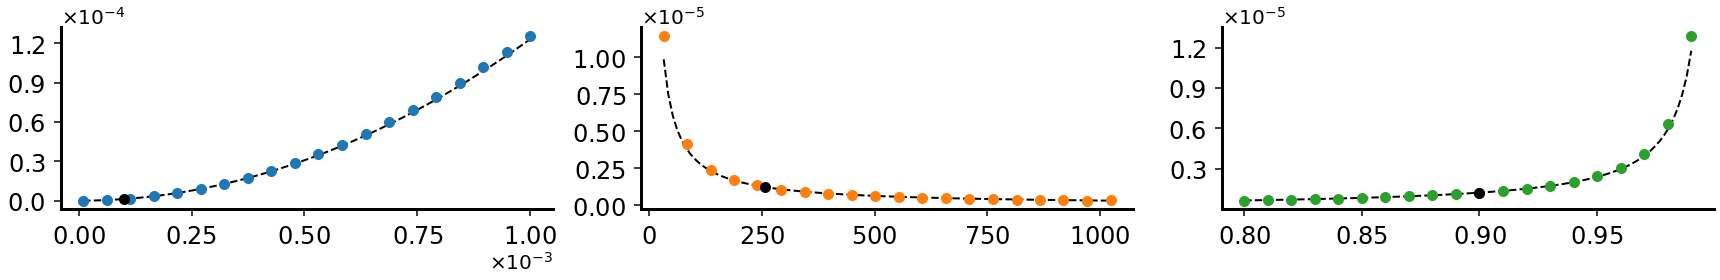

In [941]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 4 * nrows))
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
lrs = np.linspace(1e-3, 1e-5, 20)
bss = np.linspace(32, 1024, 20)
bss = np.array([int(bs) for bs in bss])
moms = np.linspace(0.8, 0.99, 20)

lr_= f"{lr:1.2e}".replace("-","n").replace(".","d")
wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
mom_ = f"{momentum}".replace(".", "")
experiment = "lean_sweep_3"
expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/loss_diff_from_ckpt.h5", "/loss_diff")

default_vel_norm = (lr**2)*d["vel_norm"][-1]
y_theory = lr**2 / (bs * (1-momentum**2))
sigma_tr_H = default_vel_norm / y_theory
axes[0].scatter(lr, (lr**2)*d["vel_norm"][-1], color="k", s=100, zorder=300)
axes[1].scatter(bs, (lr**2)*d["vel_norm"][-1], color="k", s=100, zorder=300)
axes[2].scatter(momentum, (lr**2)*d["vel_norm"][-1], color="k", s=100, zorder=300)

ax = axes[0]
axes[0].scatter(lrs, lr_deltas, color=plt.cm.tab10(0), s=100, zorder=200)
lrs = np.linspace(min(lrs), max(lrs), 100)
y_theory = lrs**2 / (bs * (1-momentum**2))*sigma_tr_H 
ax.plot(lrs, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)

ax = axes[1]
ax.scatter(bss, bs_deltas, color=plt.cm.tab10(1), s=100, zorder=200)
bss = np.linspace(min(bss), max(bss), 100)
y_theory = lr**2 / (bss * (1-momentum**2))*sigma_tr_H 
ax.plot(bss, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)


ax = axes[2]
ax.scatter(moms, mom_deltas, color=plt.cm.tab10(2), s=100, zorder=200)
moms_ = np.linspace(min(moms), max(moms), 100)
y_theory = lr**2 / (bs * (1-moms_**2))*sigma_tr_H
ax.plot(moms_, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)

plt.tight_layout()
plt.savefig("hyperparam_relation.pdf")

/home/jvrsgsty/py3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in log
/home/jvrsgsty/py3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in log


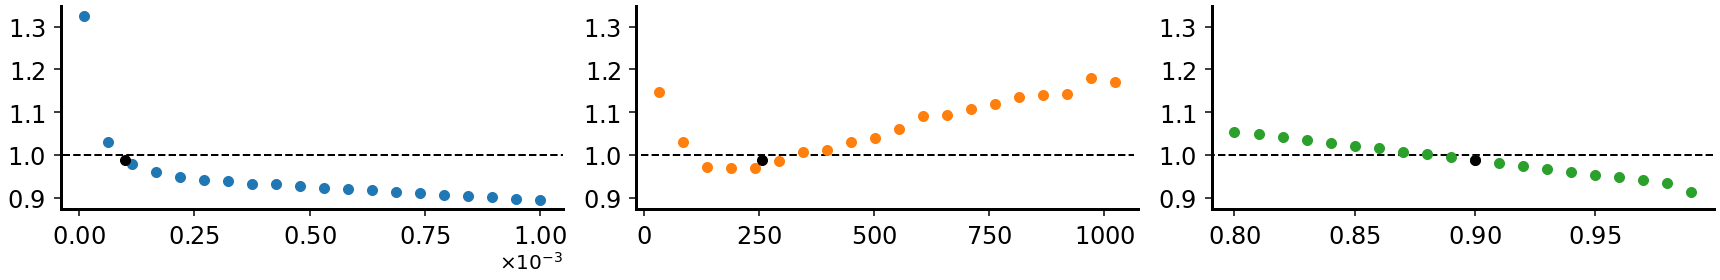

In [942]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 4 * nrows), sharey=True)
lr = 0.0001
wd = 0.0001
bs = 256
momentum = 0.9
lrs = np.linspace(1e-3, 1e-5, 20)
bss = np.linspace(32, 1024, 20)
bss = np.array([int(bs) for bs in bss])
moms = np.linspace(0.8, 0.99, 20)

lr_= f"{lr:1.2e}".replace("-","n").replace(".","d")
wd_= f"{wd:1.0e}".replace("-","n") if wd > 0 else "0"
mom_ = f"{momentum}".replace(".", "")
experiment = "lean_sweep_3"
expid = f"res18_lr{lr_}_wd{wd_}_mom{mom_}_bs{bs}"
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
steps = d["step"][2:-1]
default_performance = d["test_loss"][-1]
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/dist_from_start_from_ckpt.h5", "/dist_from_start")
x = steps
y = d["dist_from_start"]**2
x = np.log(x[1:])
y = np.log(y[1:])
x_ = x#[len(x)//2:]
y_ = y#[len(y)//2:]
model = LinearRegression()
model.fit(x_[:, np.newaxis], y_)
default_intercept = model.intercept_
default_coef = model.coef_[0]

axes[0].scatter(lr, default_coef, color="k", s=100, zorder=300)
axes[1].scatter(bs, default_coef, color="k", s=100, zorder=300)
axes[2].scatter(momentum, default_coef, color="k", s=100, zorder=300)

lr_intercept_theory = np.log(lr**2)
lr_intercept_const = default_intercept - lr_intercept_theory

lr_coef_theory = 1/lr
lr_coef_const = default_coef / lr_coef_theory

bs_intercept_theory = np.log(1 / bs)
bs_intercept_const = default_intercept - bs_intercept_theory

mom_intercept_theory = np.log(1 / (1-momentum**2))
mom_intercept_const = default_intercept - mom_intercept_theory

mom_coef_theory = (1-momentum)/(1+momentum)
mom_coef_const = default_coef - mom_coef_theory

ax = axes[0]
#ax2 = ax.twinx()
ax.scatter(lrs, lr_Delta_slopes, color=plt.cm.tab20(0), s=100, marker="o", zorder=200)
#ax2.scatter(lrs, lr_Delta_intercepts, color=plt.cm.tab20(1), s=100, marker="s", zorder=200)
lrs = np.linspace(min(lrs)-1, max(lrs)+1, 100)
xlim = ax.get_xlim()
ax.plot(lrs, 1*np.ones_like(lrs), "k--", lw=2)
ax.set_xlim(xlim)
y_theory = 1/lrs * lr_coef_const
y_theory = y_theory
#ax.plot(lrs, y_theory, "r--", lw=2)
y_theory = np.log(lrs**2) + lr_intercept_const 
#ax2.plot(lrs, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)

ax = axes[1]
#ax2 = ax.twinx()
ax.scatter(bss, bs_Delta_slopes, color=plt.cm.tab20(2), s=100, marker="o", zorder=200)
#ax2.scatter(bss, bs_Delta_intercepts, color=plt.cm.tab20(3), s=100, marker="s", zorder=200)
xlim = ax.get_xlim()
bss = np.linspace(min(bss)-40, max(bss)+40, 100)
ax.set_xlim(xlim)
ax.plot(bss, 1*np.ones_like(bss), "k--", lw=2)
y_theory = np.log(1 / bss) + bs_intercept_const
#ax2.plot(bss, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)


ax = axes[2]
#ax2 = ax.twinx()
ax.scatter(moms, mom_Delta_slopes, color=plt.cm.tab20(4), s=100, marker="o", zorder=200)
#ax2.scatter(moms, mom_Delta_intercepts, color=plt.cm.tab20(5), s=100, marker="s", zorder=200)
moms_ = np.linspace(min(moms)-1, max(moms)+1, 100)
xlim = ax.get_xlim()
ax.plot(moms_, 1*np.ones_like(moms_), "k--", lw=2)

y_theory = (1-moms_) / (1+moms_) + mom_coef_const
y_theory = y_theory
#ax.plot(moms_, y_theory, "r--", lw=2)
ax.set_xlim(xlim)
y_theory = np.log(1 / (1-moms_**2)) + mom_intercept_const
#ax2.plot(moms_, y_theory, "k--", lw=2)
style_axes(ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,1), useMathText=True)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,1), useMathText=True)
ax.yaxis.offsetText.set_fontsize(20)

plt.tight_layout()
plt.savefig("diffusion_coef_sweeep.pdf")

In [861]:
default_coef

0.9873741

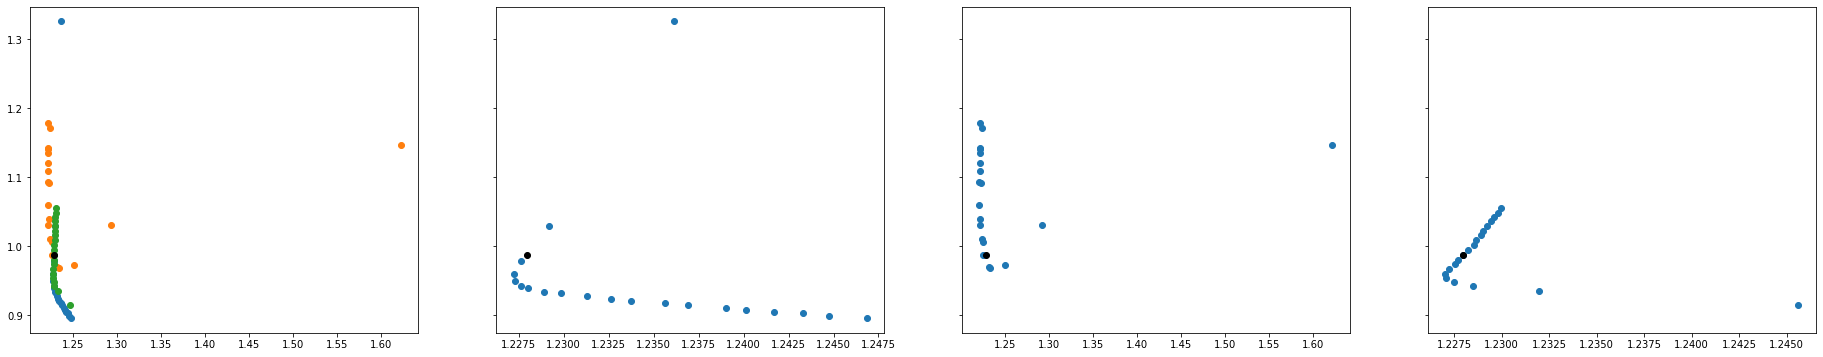

In [939]:
nrows = 1
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows), sharey=True)

ax = axes[0]
#ax.scatter(lr_performance+mom_performance+bs_performance, lr_Delta_slopes+mom_Delta_slopes+bs_Delta_slopes)
ax.scatter(lr_performance, lr_Delta_slopes)
ax.scatter(bs_performance, bs_Delta_slopes)
ax.scatter(mom_performance, mom_Delta_slopes)
ax.scatter(default_performance, default_coef, color="k")
#ax.plot([69.5, 70.2], 1*np.ones(2), "k--", lw=2)
#ax.set_xlim([69.5, 70.4])

ax = axes[1]
ax.scatter(lr_performance, lr_Delta_slopes)
ax.scatter(default_performance, default_coef, color="k")

ax = axes[2]
ax.scatter(bs_performance, bs_Delta_slopes)
ax.scatter(default_performance, default_coef, color="k")

ax = axes[3]
ax.scatter(mom_performance, mom_Delta_slopes)
ax.scatter(default_performance, default_coef, color="k")



dict_keys(['dist_from_start'])

## Negative momentum

Text(0.5, 0, 'Train epoch')

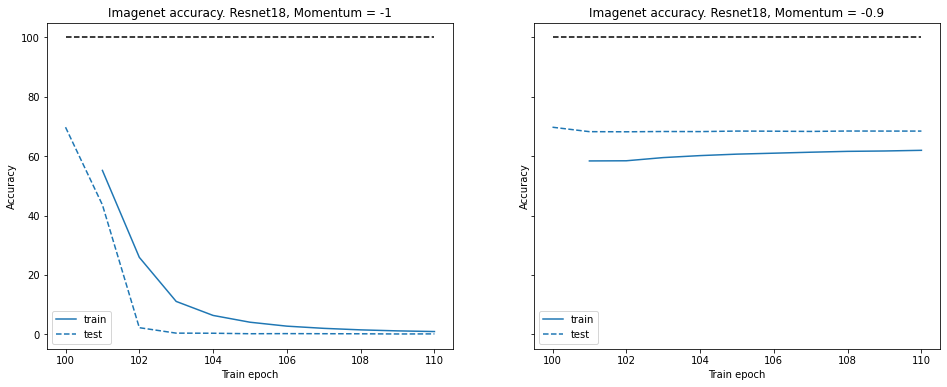